AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [12]:
import pandas as pd

# 1. Import the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 2. Create a DataFrame from the dataset
# (Already done in the previous step)

# 3. Print the first 10 rows of the dataset
first_10_rows = df.head(10)

# 4. Print the last 20 rows of the dataset
last_20_rows = df.tail(20)

# 5. Print dataset's information
info = df.info()

# 6. Describe the dataset
description = df.describe()

# 7. Display all information in a single table
summary = pd.concat([first_10_rows, last_20_rows], axis=0)
summary_info = pd.DataFrame({
    'Info': [info],
    'Description': [description]
})

print(summary)
print(summary_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in the dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


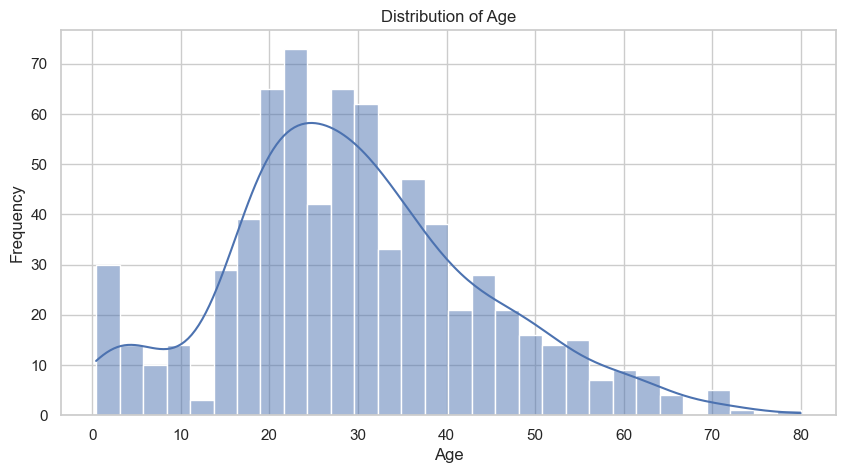

Mean Age: 29.69911764705882, Median Age: 28.0

Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

# 2. For the 'Age' column, find the best way to handle the missing values
# 2.1. Use an appropriate plot to study the nature of the 'Age' column
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2. Calculate the central tendency of the 'Age' column
mean_age = df['Age'].mean()
median_age = df['Age'].median()
print(f"Mean Age: {mean_age}, Median Age: {median_age}")

# Assuming the distribution is right-skewed, we might choose median
# 2.3. Fill the missing values in the 'Age' column with the median
df['Age'].fillna(median_age, inplace=True)

# 3. Handle the missing values in the 'Cabin' column
# Since 'Cabin' has many missing values, we can either drop it or fill with a placeholder
df['Cabin'].fillna('Unknown', inplace=True)

# 4. Handle the missing values in the 'Embarked' column
# Filling with the most common port of embarkation (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 5. Handle incorrect data under the 'Survived' column
# Assuming 'Survived' should be binary (0 or 1), we can drop invalid entries
df = df[df['Survived'].isin([0, 1])]

# 6. Handle incorrectly formatted data under the 'Fare' column
# Check for negative fares and replace them with the median
df['Fare'] = df['Fare'].apply(lambda x: x if x >= 0 else np.nan)
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)

# Final summary of the dataset
print("\nUpdated Dataset Information:")
print(df.info())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average fare grouped by Pclass:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


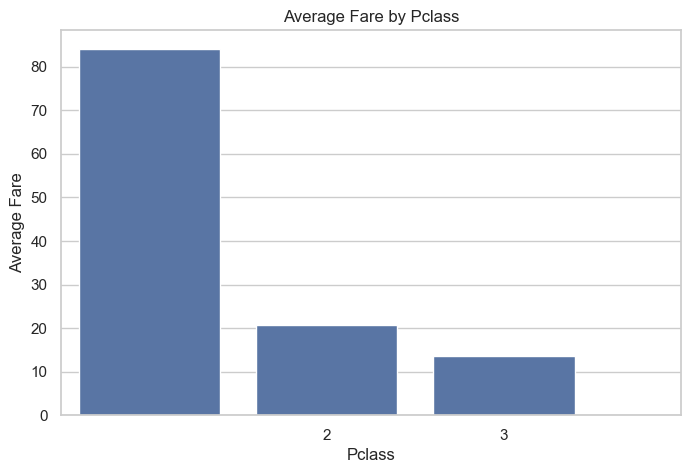


Average fare grouped by Sex:
 Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


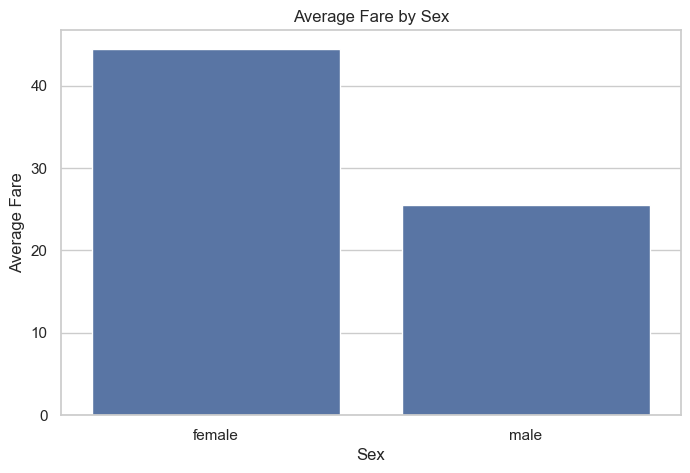

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Find out the average fare grouped by Pclass
average_fare_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average fare grouped by Pclass:\n", average_fare_pclass)

# 1.1. Plot the average fare by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_pclass.index, y=average_fare_pclass.values)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(ticks=average_fare_pclass.index)
plt.show()

# 2. Find out the average fare grouped by Sex
average_fare_sex = df.groupby('Sex')['Fare'].mean()
print("\nAverage fare grouped by Sex:\n", average_fare_sex)

# 2.1. Plot the average fare by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_sex.index, y=average_fare_sex.values)
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(ticks=average_fare_sex.index)
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

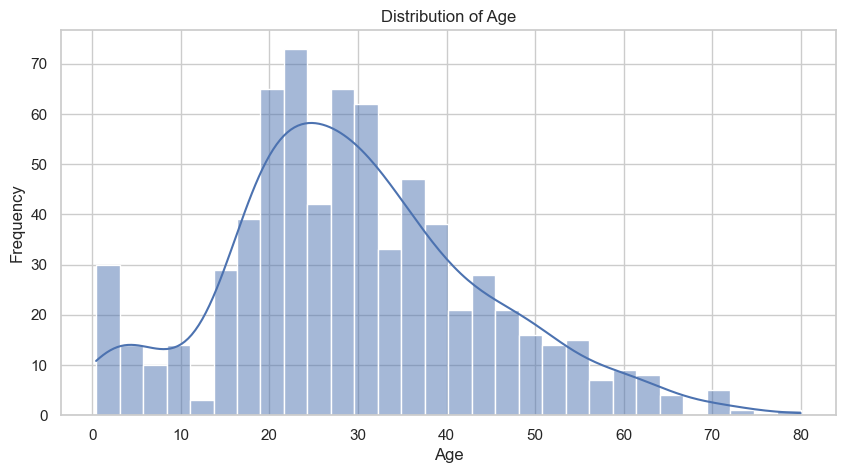

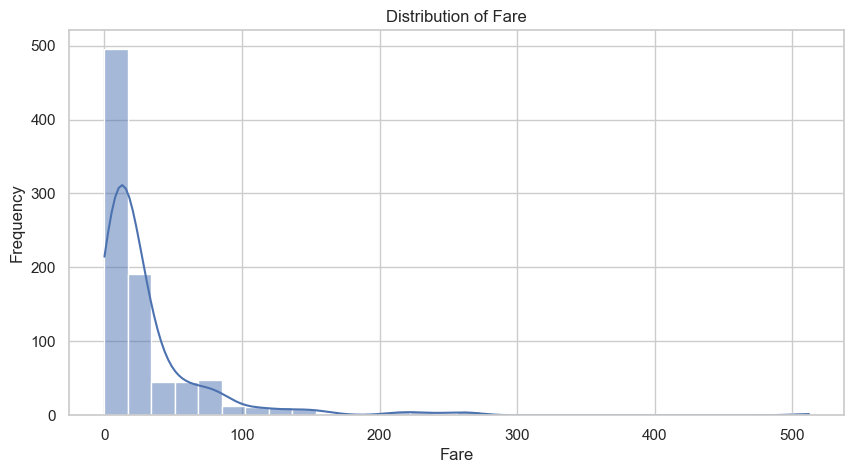

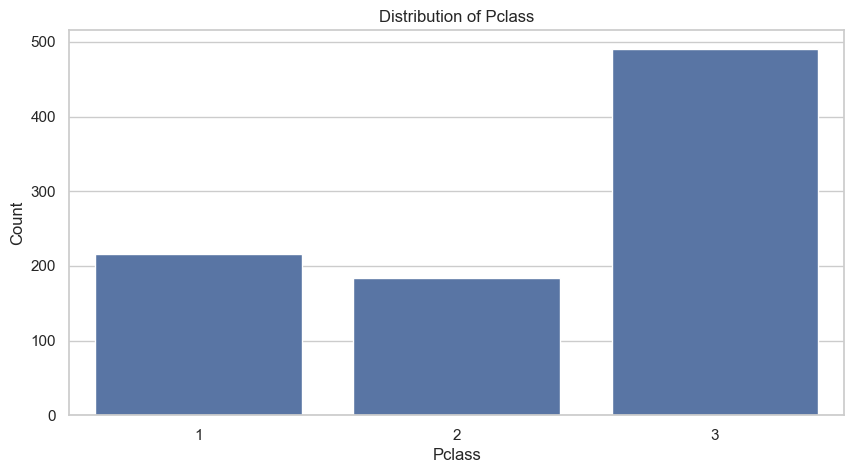

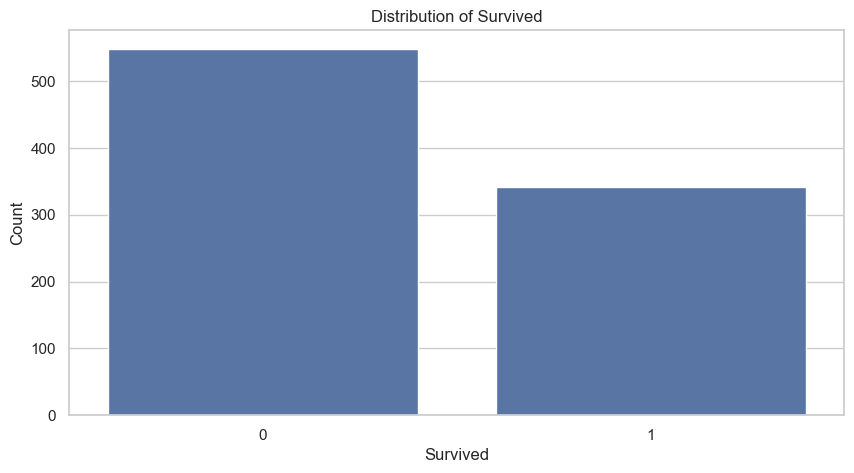

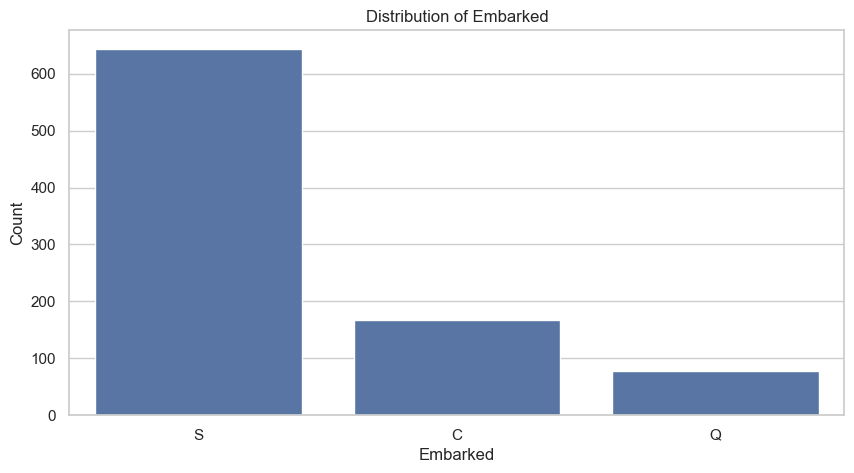

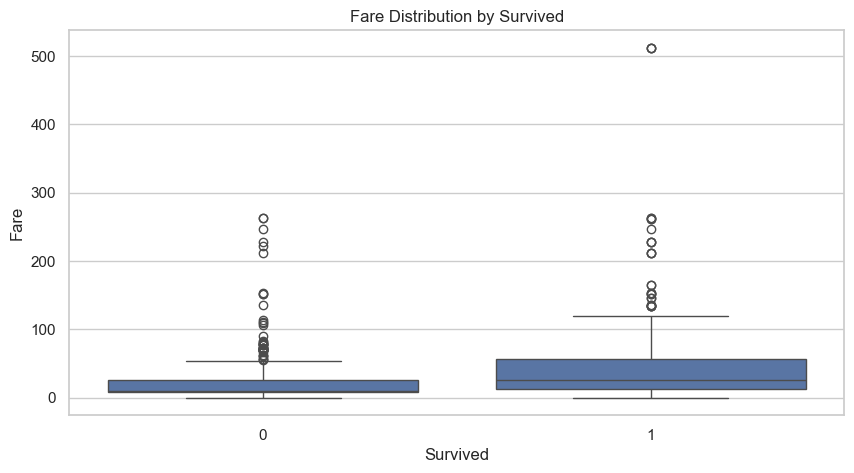

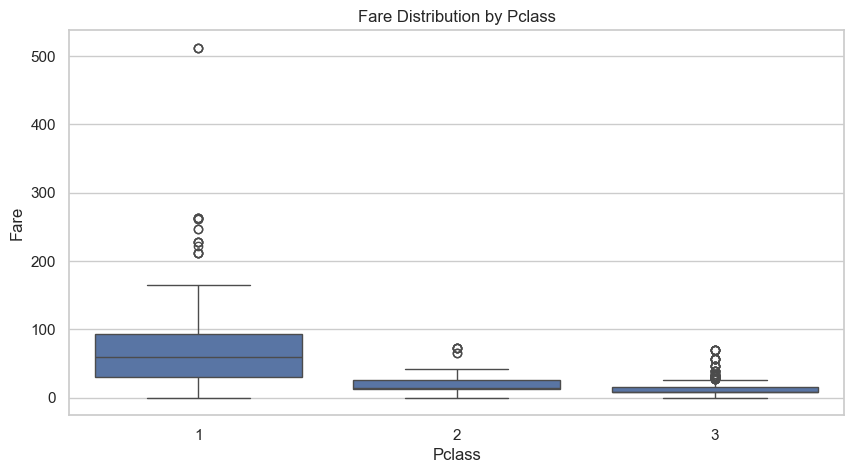

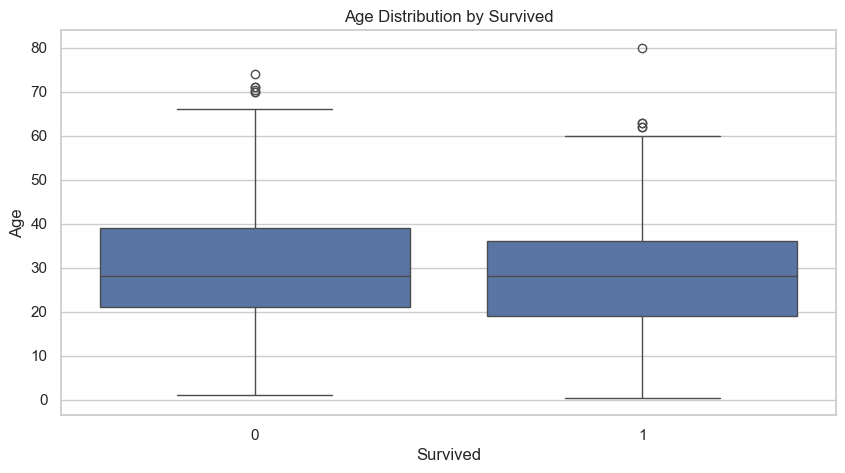

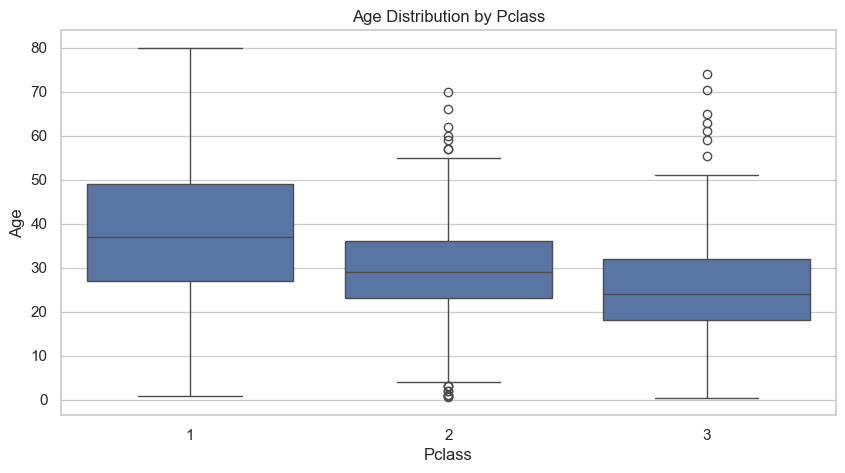

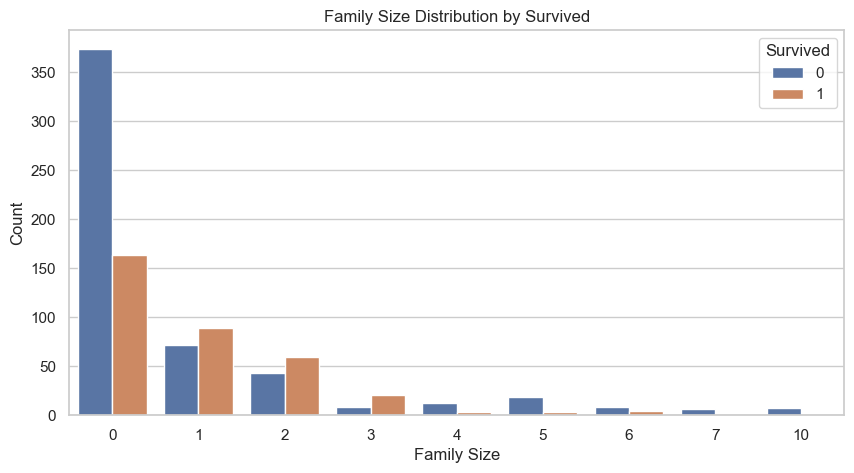

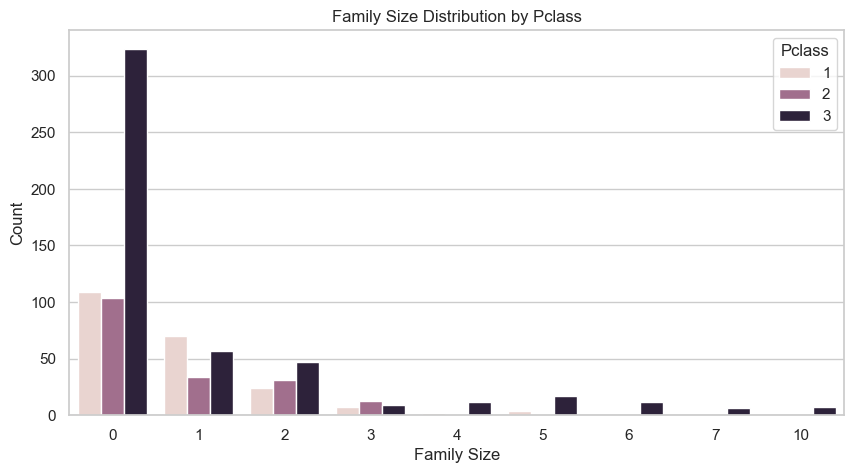

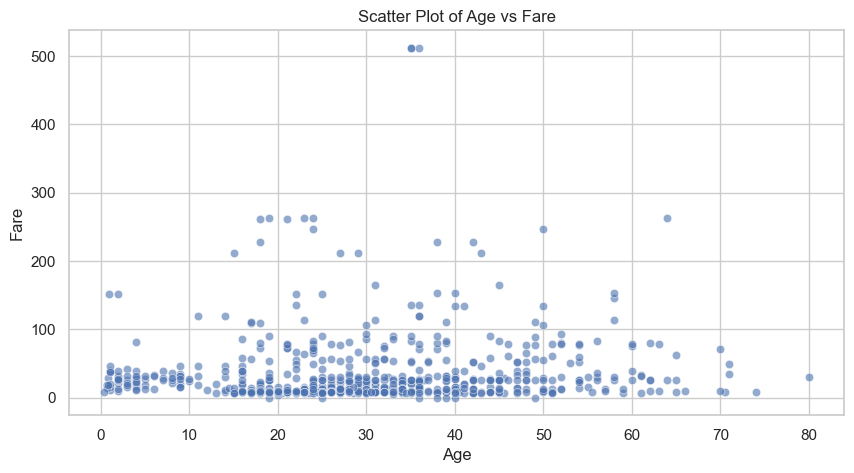

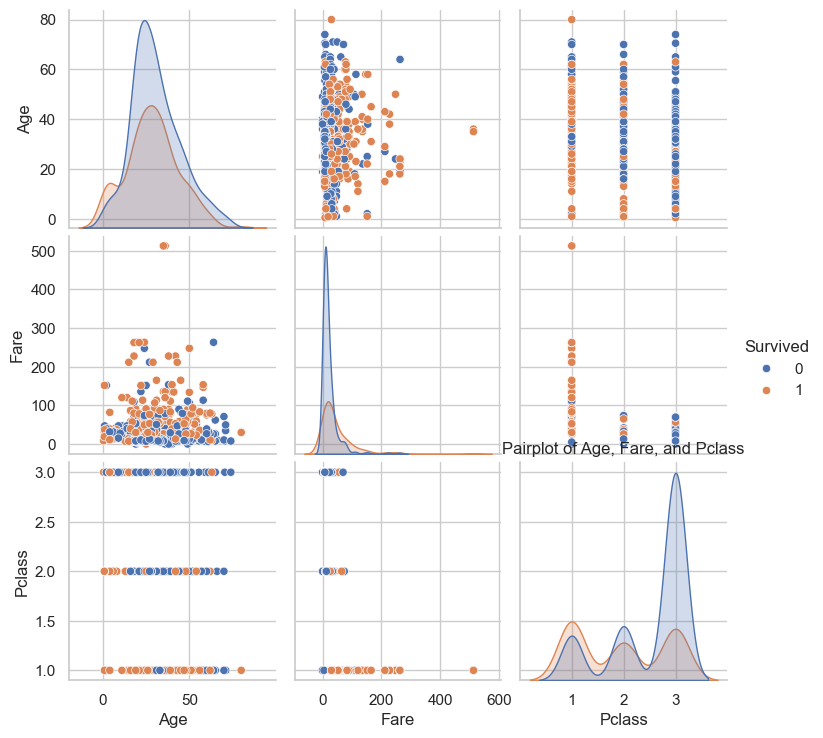

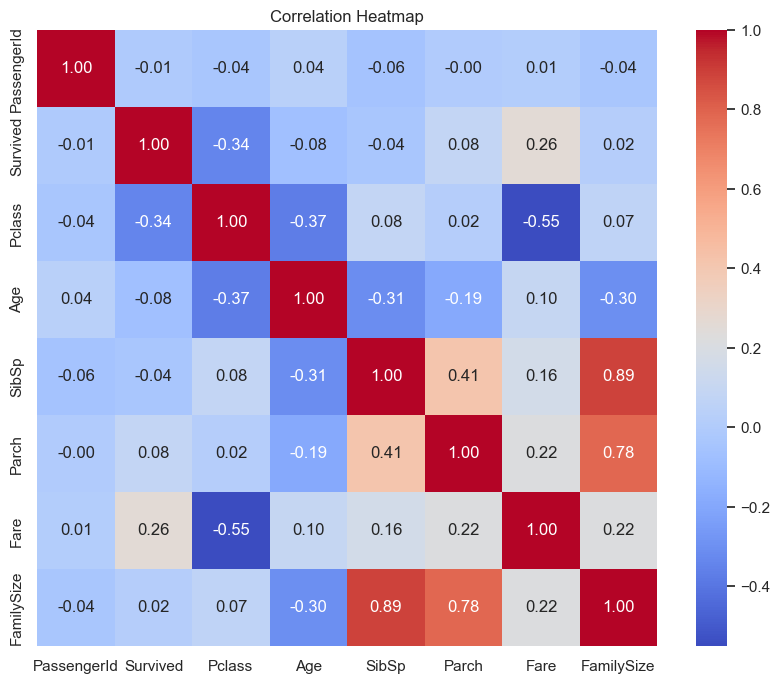

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# 1. Plot the distribution of 'Age'
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 11. Plot 'FamilySize' distribution grouped by 'Pclass'
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', hue='Pclass', data=df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Other relationships can be explored through pair plots or heatmaps
# Pairplot example
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.title('Pairplot of Age, Fare, and Pclass')
plt.show()

# Correlation heatmap example with numeric columns only
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

Correlation between Age and Fare: 0.09606669176903888

Correlations with absolute value greater than 0.3:
              PassengerId  Survived    Pclass       Age

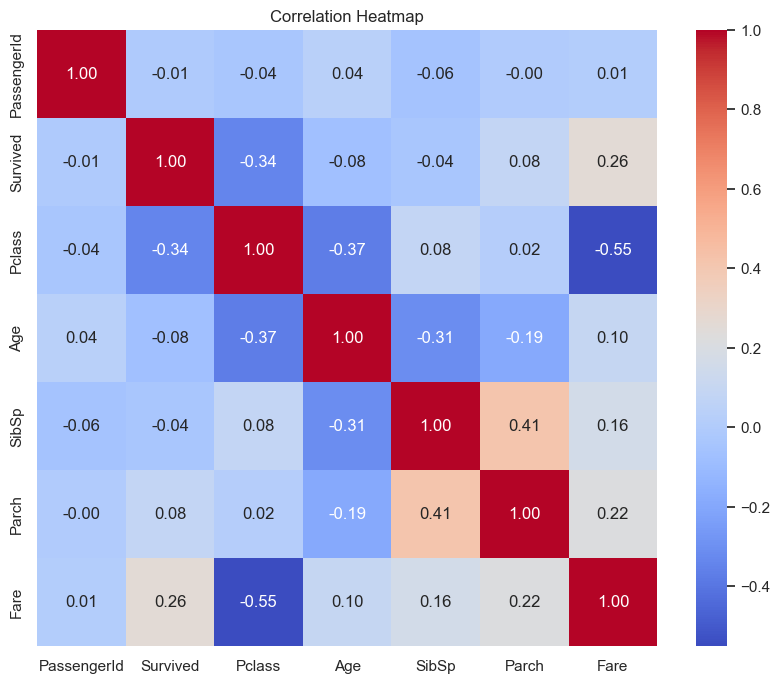

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Generate a correlation matrix for the entire dataset
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# 2. Find correlation between 'Age' and 'Fare'
age_fare_correlation = df['Age'].corr(df['Fare'])
print("\nCorrelation between Age and Fare:", age_fare_correlation)

# 3. Identify other possible correlations in the dataset
# Display correlations greater than a threshold (e.g., 0.3 or -0.3)
threshold = 0.3
correlated_features = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
print("\nCorrelations with absolute value greater than 0.3:\n", correlated_features)

# Optionally, visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
